In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
sales=pd.read_csv('Sales.csv')
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df=sales.drop(columns='Unnamed: 0')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
sales['Radio']

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

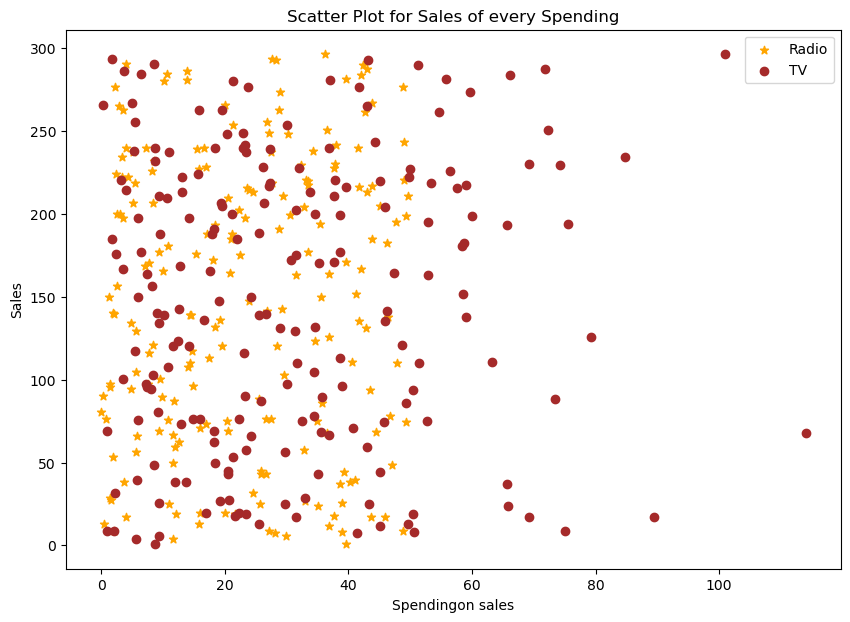

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(df['Radio'],df['TV'],label='Radio',color='orange',marker='*')
plt.scatter(df['Newspaper'],df['TV'],label='TV',color='brown',marker='o')
plt.xlabel('Spendingon sales')
plt.ylabel('Sales')
plt.title('Scatter Plot for Sales of every Spending')
plt.legend()
plt.show()

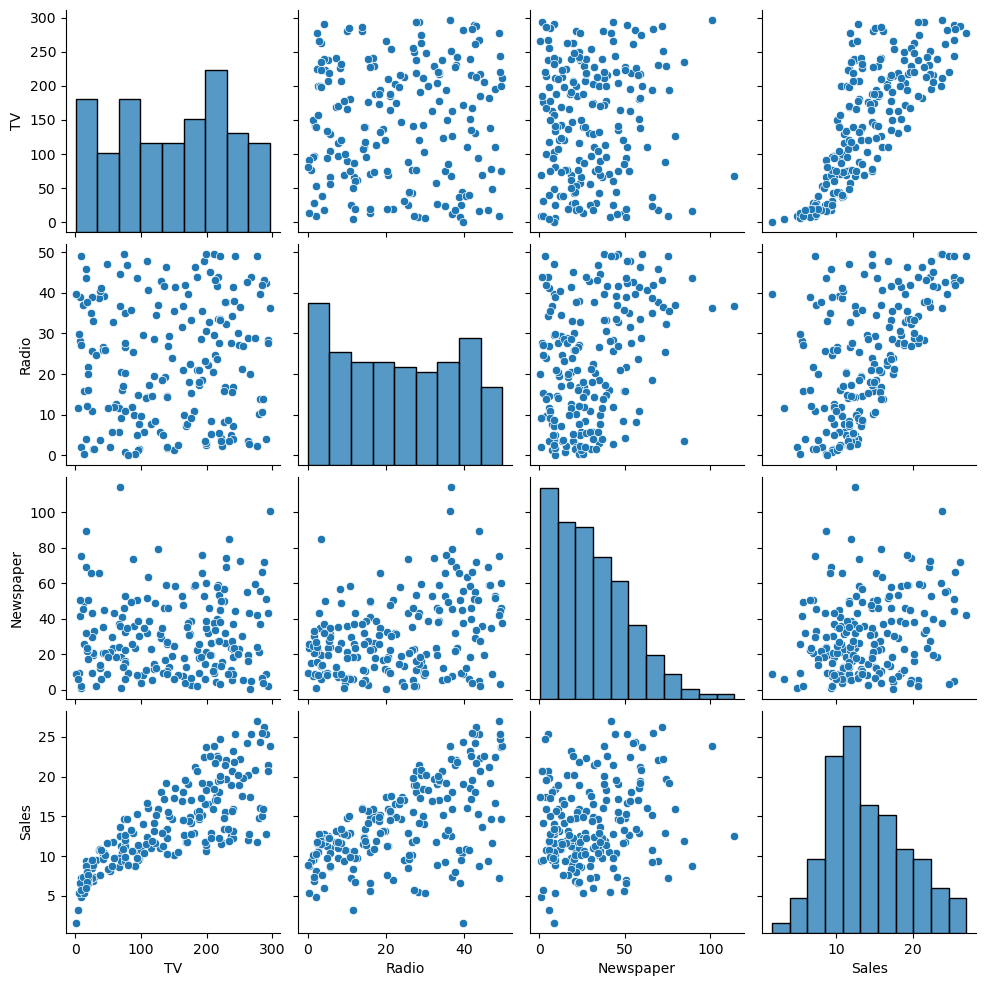

In [18]:
sns.pairplot(df)

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


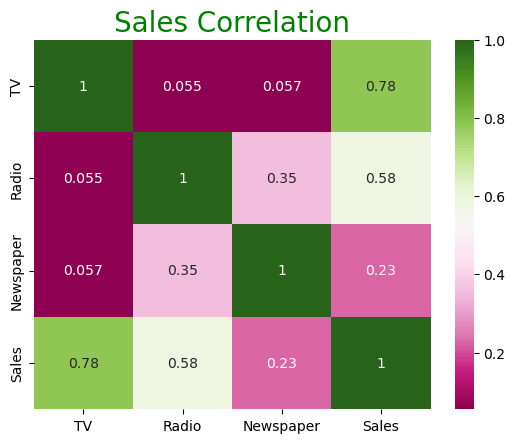

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='PiYG')
plt.title('Sales Correlation',color='green',size=(20))
plt.show()

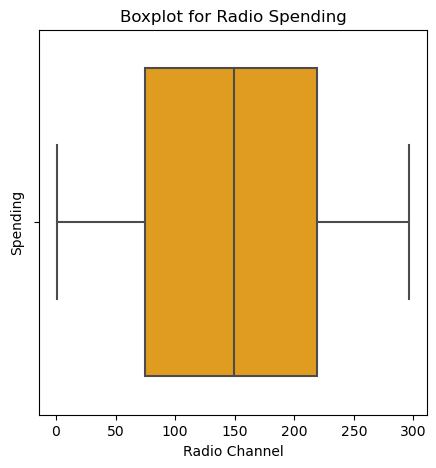

In [11]:
plt.figure(figsize=(5,5))
sns.boxplot(df['TV'],color='orange')
plt.xlabel('Radio Channel')
plt.ylabel('Spending')
plt.title('Boxplot for Radio Spending')
plt.show()

In [51]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [79]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=55)

In [80]:
xtrain

,TV,Radio,Newspaper
192,17.2,4.1,31.6
63,102.7,29.6,8.4
12,23.8,35.1,65.9
92,217.7,33.5,59.0
46,89.7,9.9,35.7
...,...,...,...
189,18.7,12.1,23.4
29,70.6,16.0,40.8
125,87.2,11.8,25.9
39,228.0,37.7,32.0


In [81]:
ytrain

192     5.9
63     14.0
12      9.2
92     19.4
46     10.6
       ... 
189     6.7
29     10.5
125    10.6
39     21.5
154    15.6
Name: Sales, Length: 140, dtype: float64

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model=LinearRegression()

In [84]:
model.fit(xtrain,ytrain)

LinearRegression()

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [86]:
pred=model.predict(xtest)

In [87]:
MAE=mean_absolute_error(ytest,pred)
MSE=mean_squared_error(ytest,pred)
RMSE=mean_squared_error(ytest,pred,squared=False)
r2=r2_score(ytest,pred)
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-Squared (R2) Score: {r2}")

Mean Absolute Error: 1.169185018376801
Mean Squared Error: 2.284613444616696
Root Mean Squared Error: 1.5114937792186562
R-Squared (R2) Score: 0.913387028554259
